# Classificação espectral de estrelas usando Machine Learning

- PET - Física
- Petiano: Gabriel Wendell Celestino Rocha
- Data: 06 de Julho de 2022

O objetivo deste `Notebook` é servir como uma aplicação prática de *Machine Learning*, servindo assim como uma espécie de pequeno "tour" pelo aprendizado estatístico, abrangendo técnicas de aprendizado não supervisionado e supervisionado. Neste `Notebook` em particular aplicaremos algoritmos de ML bem conhecidos em um conjunto de dados astronômicos representativos dos casos de uso mais comuns: mineração de dados tabulares.

Para uma melhor organização deste `Notebook` como um todo, este foi dividido em três seções:

- **Introdução teórica.**
- **Botando a mão na massa.**

## Pré-requisitos

Este `Notebook` assume que o leitor esteja ao menos um pouco familiarizado com o Python e seu ecossistema de computação científica, além dos conceitos básicos de *Machine Learning*. Em particular, este `Notebook` decorreu de uma inspiração do minicurso [*Uma breve introdução ao Machine Learning*](https://petfisica.home.blog/2022/06/29/minicursos-do-pet-uma-breve-introducao-ao-machine-learning/) ofertado pelo PET - Física da UFRN. Além disso, vamos tentar gerar um diagrama HR usando *Machine Learning*, por isso é recomendável que o leitor esteja familiarizado com esse tipo de diagrama. Para mais informações sobre o diagrama HR, consulte a referência [2] ou clique [aqui](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Construção%20de%20um%20diagrama%20de%20Hertzsprung-Russell.ipynb) para checar um `Notebook` sobre o diagrama HR.

### Importando as bibliotecas

A função `opt_plot()` é praticamente onipresente em todos os `Notebooks` que eu escrevo. Por isso, vamos defini-lá logo no ínicio junto com as bibliotecas necessárias.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)

#### Detalhes das bibliotecas:

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy, Pandas, Seaborn

Software versions
Python 3.9.8 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.0.1
OS Windows 10 10.0.19043
Matplotlib 3.5.1
Numpy 1.22.2
Pandas 1.4.0
Seaborn 0.11.2
Wed Jul 06 08:49:58 2022 Hora Padrão de Buenos Aires

Para instalar a magic extension `%version_information` do `IPython` usando o `pip`, execute a seguinte linha de comando em um terminal de sua preferência:

```Python
$ pip install version_information
```

Dado o exposto, vamos ao `Notebook` propriamente dito.

---

## 1. Introdução

Vamos estudar um caso muito comum na ciência de dados: dados tabulares. Começamos assumindo que temos um conjunto de observações (linhas) e que para cada uma delas temos um conjunto de medidas ou características (colunas). Aqui vamos trabalhar com um catálogo de estrelas de 240 estrelas descrito pelas seguintes informações:

- Temperatura (`K`, em Kelvin)
- Luminosidade (`L/Lo`)
- Raio (`R/Ro`)
- Magnitude absoluta (`Mv`)

Também temos os seguintes dados para cada estrela:

- Cor (`Red`/`Orange`/`Yellow`/`White`/`Blue`/...)
- Classe espectral (`A`, `B`, `F`, `G`, `K`, `M`, `O`)
- Tipo estelar (`Brown dwarf`/`Red dwarf`/`White dwarf`/`Main sequence`/`Supergiant`/`Hypergiant`)

Este conjunto de dados foi coletado por [Deepraj Baidya](https://github.com/deepraj1729) e foi publicado originalmente no [Kaggle](https://www.kaggle.com/datasets/deepu1109/star-dataset) [1]. As medições foram coletadas da Wikipedia ou derivadas das leis físicas.

Desejamos construir um modelo de decisão para nos ajudar a categorizar estrelas com base em suas propriedades observadas. Matematicamente, isso significa que queremos construir uma função de classificação que produza:

$$f:(x_1,x_2,\ldots,x_n)\in\mathbb{R}^{n}\rightarrow f(x_1,x_2,\ldots,x_n)=y\subset\{0,1,2,\ldots,k-1\}$$

onde:

- $(x_1,\ldots,x_n)$ representam as características (ou seja, as propriedades físicas observadas),
- $y$ representa o índice da classe (ou seja, o tipo de estrela).

Este é um exemplo um tanto quanto ingênuo, mas que será útil para demonstrar alguns conceitos básicos do aprendizado de máquina.

---

## Botando a mão na massa

Vamos implementar os conceitos abordados nessa rápida introdução teórica de forma prática usando o Python.

### 2.1 Carregamento e pré-processamento dos dados

Como de praxe em praticamente todos os `Notebook` relacionados à Astronomia/Astrofísica/Cosmologia, vamos usar a biblioteca `Pandas` para ler o arquivo `stars.csv` e criar assim um dataframe com nosso catálogo:

In [3]:
df_stars = pd.read_csv('Dados/stars.csv')

O conjunto de dados é composto por 240 estrelas e suas propriedades. Observando os dados, podemos ver que algumas das variáveis são valores contínuos (por exemplo, temperatura), enquanto outras são categóricas (cor e classe).

In [4]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


Nosso objetivo com este conjunto de dados é tentar aprender uma estatística que infere o tipo de estrela com base em suas propriedades físicas. Existem 6 tipos de estrelas codificados no coluna `Star type`. Chamamos essas informações de rótulos (*labels*).

Os rótulos são atualmente codificados como `strings`, o que é prático para leitura, mas não para computação. Usando a biblioteca `scikit-learn`, convertemos esta coluna em inteiros atribuindo um valor `int` único a cada tipo de estrela. O objeto `LabelEncoder` é usado para converter de um conjunto de valores para inteiros.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Atribui inteiros únicos de 0 a 6 para cada tipo de estrela
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


Agora definimos os `labels` de nosso dataframe:

In [6]:
labels = le.inverse_transform(df_stars['Star type'])
labels

array(['Brown Dwarf', 'Brown Dwarf', 'Brown Dwarf', 'Brown Dwarf',
       'Brown Dwarf', 'Brown Dwarf', 'Brown Dwarf', 'Brown Dwarf',
       'Brown Dwarf', 'Brown Dwarf', 'Red Dwarf', 'Red Dwarf',
       'Red Dwarf', 'Red Dwarf', 'Red Dwarf', 'Red Dwarf', 'Red Dwarf',
       'Red Dwarf', 'Red Dwarf', 'Red Dwarf', 'White Dwarf',
       'White Dwarf', 'White Dwarf', 'White Dwarf', 'White Dwarf',
       'White Dwarf', 'White Dwarf', 'White Dwarf', 'White Dwarf',
       'White Dwarf', 'Main Sequence', 'Main Sequence', 'Main Sequence',
       'Main Sequence', 'Main Sequence', 'Main Sequence', 'Main Sequence',
       'Main Sequence', 'Main Sequence', 'Main Sequence', 'Supergiant',
       'Supergiant', 'Supergiant', 'Supergiant', 'Supergiant',
       'Supergiant', 'Supergiant', 'Supergiant', 'Supergiant',
       'Supergiant', 'Hypergiant', 'Hypergiant', 'Hypergiant',
       'Hypergiant', 'Hypergiant', 'Hypergiant', 'Hypergiant',
       'Hypergiant', 'Hypergiant', 'Hypergiant', 'Brown Dwarf',


Queremos construir um modelo estatístico que aprenda a mapear temperatura, luminosidade, raio e magnitude absoluta para o tipo de estrela. Como os rótulos são categóricos, essa tarefa é chamada de **classificação**.

Usaremos uma abordagem supervisionada: construímos um modelo treinando-o em alguns exemplos para os quais conhecemos os rótulos reais (a verdade básica). Em seguida, tentaremos ver se o modelo pode inferir o tipo de estrela correto em novos dados que não viu durante a etapa de treino.

### 2.2 Análise preliminar

Muitas vezes, é uma boa prática começar com uma análise estatística do conjunto de dados para responder às seguintes perguntas:

- existem valores ausentes/faltantes?
- existem `NaN`s nos dados?
- algumas das variáveis são redundantes (ou seja, fortemente correlacionada)?
- a distribuição de dados está distorcida de alguma forma?

Podemos começar traçando as correlações entre as variáveis:

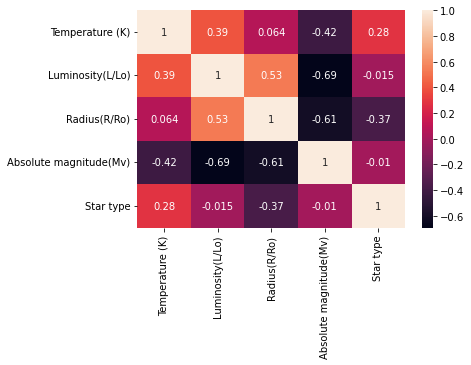

In [7]:
# fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_stars.corr(), annot = True) 

plt.savefig('Matriz de Confusão #01.png', dpi = 400)

O tipo de estrela não está correlacionado com nenhuma coluna específica do catálogo. Podemos ver que algumas variáveis estão correlacionadas (positiva ou negativamente), mas não totalmente redundantes. Se duas variáveis estivessem fortemente correlacionadas, talvez fosse uma boa ideia remover uma ou duas.

A classificação por estrelas é algo que pode ser feito com base em regras dependendo da temperatura ou luminosidade. Por exemplo, considere o diagrama de Hertzsprung-Russell que foi construído no `Notebook` [Construindo o diagrama de Hertzsprung-Russell](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Construção%20de%20um%20diagrama%20de%20Hertzsprung-Russell.ipynb) [2]:

![image](https://media.giphy.com/media/MhpPpEM4hQ8dATbxwU/giphy.gif)

Podemos reproduzir este diagrama traçando o gráfico de dispersão de nossas estrelas usando as mesmas variáveis em escala log - log.

<IPython.core.display.Javascript object>


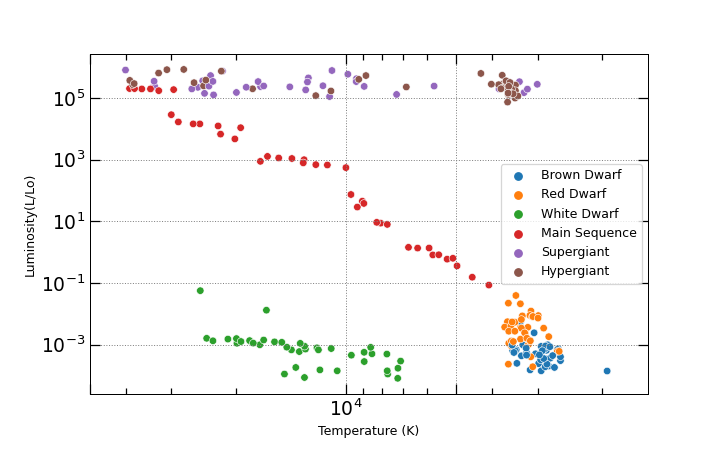

In [8]:
%matplotlib notebook

fig = plt.figure(figsize = (8, 5))

sns.scatterplot(data = df_stars, x = 'Temperature (K)', y = 'Luminosity(L/Lo)', hue = labels)
plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
opt_plot()

plt.savefig('Diagrama HR - #01.png', dpi = 400)

Encontramos a mesma organização de estrelas neste plano 2D. Estrelas da Sequência Principal e Anãs Brancas são bastante fáceis de isolar do resto: um modelo estatístico deve ser capaz de classificá-las facilmente. Com base apenas em luminosidade e temperatura, estrelas anãs e estrelas gigantes têm maior variabilidade intragrupo: supergigantes e hipergigantes cobrem o mesmo espaço (o mesmo para anãs marrons e vermelhas). Variáveis adicionais podem ser necessárias para identificar corretamente os tipos dessas estrelas.

### 2.3 Redução da dimensão

Uma primeira etapa comum para análise de dados é a redução de dimensão para reduzir o número de recursos (variáveis de coluna) no conjunto de dados. Existem dois usos principais para algoritmos de redução de dimensão:

1. visualização ao reduzir o número de variáveis para 2 ou 3;
2. reduzindo o número de variáveis para facilitar a mineração de dados (por exemplo, combater a maldição da dimensionalidade).

Um algoritmo de redução de dimensão bem conhecido é a **Análise de Componentes Principais** (PCA). O PCA encontra combinações lineares de variáveis que explicam a maior parte da variância dos dados.

A biblioteca `scikit-learn` oferece um módulo PCA que é simples de usar. Quase todos os modelos estatísticos implementados no `sklearn` seguem a mesma interface. Vamos começar importanto o módulo desejado.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

Por padrão, o objeto `PCA()` executa uma decomposição completa com tantos componentes quantos são as variáveis de entrada. No entanto, neste caso vamos realizar um PCA para visualização usando uma nuvem de pontos 2D, para que possamos manter os 2 primeiros componentes principais.

A execução do PCA real é feita usando o método `.fit()` nos dados. Manteremos apenas as medidas físicas para esta análise. O PCA **não é supervisionado**, o que significa que o modelo depende apenas das observações (e não requer rótulos).

In [10]:
df_stars_data = df_stars.drop(columns = ["Star color", "Star type", "Spectral Class"])
X = np.array(df_stars_data)

Observe que o `scikit-learn` espera um array `NumPy`. Ele converterá automaticamente os dados que são alimentados nele em `np.array`, se necessário. No nosso caso, a tabela do `Pandas` é convertida em tempo real. Não faremos isso manualmente no restante deste `Notebook`.

`X` agora representa nossa matriz de dados na qual poderemos realizar o aprendizado de máquina.

Vamos aplicar um PCA no conjunto de dados. O PCA projetará nossos dados em um espaço bidimensional que maximiza a variação:

<IPython.core.display.Javascript object>


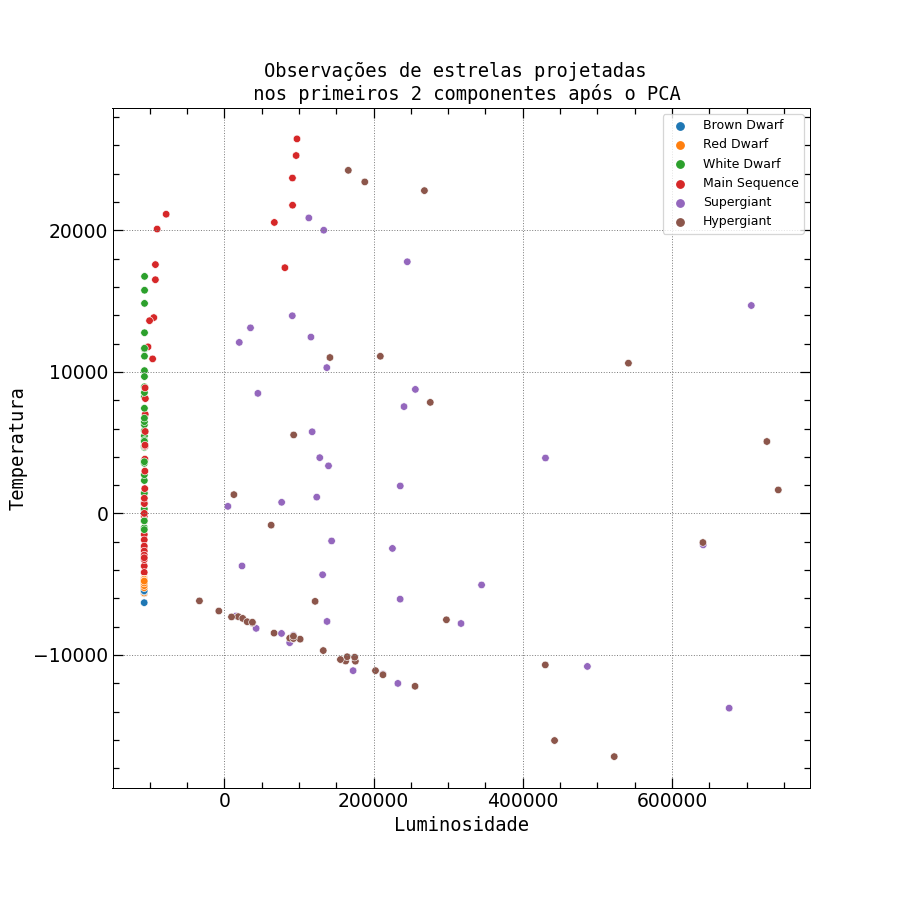

In [11]:
projected_stars = pca.fit_transform(X)

fig = plt.figure(figsize = (10, 10))

sns.scatterplot(x = projected_stars[:,0], y = projected_stars[:,1], hue = labels)
plt.title("Observações de estrelas projetadas \n nos primeiros 2 componentes após o PCA", fontsize = 15, family = 'monospace')
plt.xlabel('Luminosidade', fontsize = 15, family = 'monospace')
plt.ylabel('Temperatura', fontsize = 15, family = 'monospace')
opt_plot()

plt.savefig('Diagrama HR - #02.png', dpi = 400)

Estamos felizes? Bem, nem tanto: muitas estrelas são projetadas na mesma coordenada do eixo `x` e as estrelas restantes não são fáceis de separar no plano 2D. No entanto, esquecemos de algo: **padronização**! Nossas várias colunas são expressas em diferentes unidades o que distorce artificialmente a amplitude de valores numéricos. Vamos usar o *scaler* interno do `scikit-learn` para centralizar (`mean = 0`) e normalizar (`std = 1`) os dados.

<IPython.core.display.Javascript object>


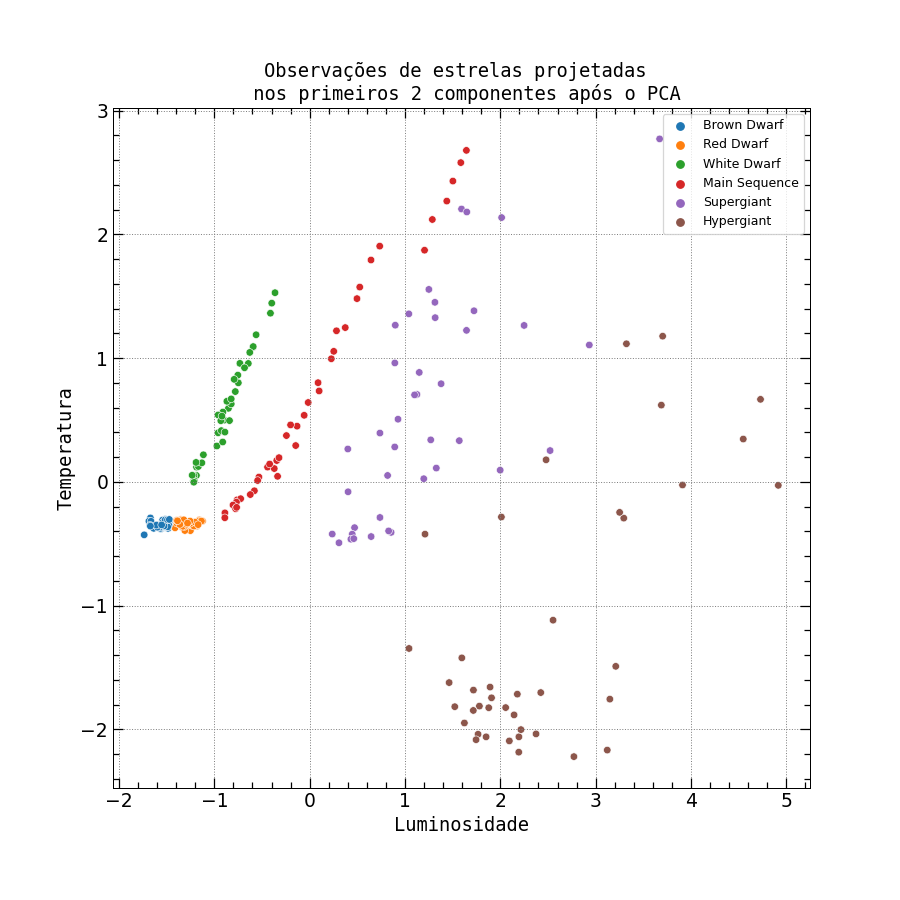

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_stars_data)

pca = PCA()
projected_stars = pca.fit_transform(X)

fig = plt.figure(figsize = (10, 10))
sns.scatterplot(x = projected_stars[:,0], y = projected_stars[:,1], hue = labels)
plt.title("Observações de estrelas projetadas \n nos primeiros 2 componentes após o PCA", fontsize = 15, family = 'monospace')
plt.xlabel('Luminosidade', fontsize = 15, family = 'monospace')
plt.ylabel('Temperatura', fontsize = 15, family = 'monospace')
opt_plot()

plt.savefig('Diagrama HR - #03.png', dpi = 400)

Isso é muito melhor! Nesta nuvem de pontos, podemos realmente ver alguns aglomerados emergindo: estrelas do mesmo tipo tendem a ser projetadas em torno do mesmo ponto no plano 2D. Isso é encorajador, pois significa que nossas observações parecem ser linearmente separáveis (ou seja, podemos traçar uma linha que separa cada tipo de estrela de todos os outros).

**Dica 1**: ao lidar com um novo conjunto de dados, a normalização ou padronização de dados geralmente facilita a mineração de dados. Para modelos lineares, o reescalonamento é necessário ao lidar com valores expressos em diferentes unidades.

O PCA encontra as combinações lineares que explicam a maior parte da variância. Podemos verificar quanta informação perdemos mantendo os dois primeiros componentes usando o atríbuto `Explain_variance_ratio_`:

In [13]:
s = 0
for idx, r in enumerate(pca.explained_variance_ratio_):
    s += r
    print(f"Componente {idx+1} explica {100*r:.1f}% da variância (cumulativo = {100*s:.1f})")

Componente 1 explica 60.4% da variância (cumulativo = 60.4)
Componente 2 explica 23.5% da variância (cumulativo = 83.9)
Componente 3 explica 9.3% da variância (cumulativo = 93.2)
Componente 4 explica 6.8% da variância (cumulativo = 100.0)


Portanto, a projeção no plano 2D explica 84% da variância do conjunto de dados . A visualização não esconde muitas informações, por isso fornece uma representação bastante fiel do conjunto de dados.

### 2.4 Seleção do modelo: divisão de treinamento/teste e validação cruzada

Após esta análise preliminar, decidimos manter todas as quatro características (temperatura, magnitude, raio e luminosidade). Construiremos um modelo estatístico que inferirá o tipo de estrela com base nesses valores.

Para avaliar a precisão do nosso modelo, dividimos o conjunto de dados em duas partes: o conjunto de treinamento e o conjunto de teste.

O conjunto de treinamento é usado para ajustar o modelo estatístico. Estes são os exemplos que são usados para "treinar" o modelo. Esperamos que o modelo seja muito preciso nesses dados. Mas 100% de precisão no conjunto de treinamento não é necessariamente um sinal de que o modelo é útil: a memorização (ou *overfitting*) pode acontecer!

Portanto, avaliaremos a precisão no conjunto de teste mantido. As amostras do conjunto de teste não foram vistas durante o treinamento do modelo. Portanto, medirá o quão bem o modelo se **generaliza** para novos dados.

O `scikit-learn` torna muito fácil dividir um conjunto de dados em treinar e testar, por exemplo, usando a função `train_test_split`. Para nosso exemplo, vamos usar apenas 20% do conjunto de dados como amostras de treinamento.

In [14]:
from sklearn.model_selection import train_test_split
stars_train, stars_test = train_test_split(df_stars.drop(columns = ["Star color", "Spectral Class"]), train_size = 0.2)

Agora podemos construir quatro arrays: `X_*` serão os recursos (de entrada) e `y_*` serão nossos alvos (os tipos de estrelas que queremos prever).

In [15]:
X_train, y_train = stars_train.drop(columns = "Star type"), stars_train["Star type"]
X_test, y_test = stars_test.drop(columns = "Star type"), stars_test["Star type"]

### 2.5 Árvore de decisão

Árvores de decisão são muito comuns em aprendizado de máquina. Seu ponto forte é a interpetabilidade: é fácil entender a posteriori porque o modelo previu o tipo A em vez do tipo B. As árvores de decisão são implementadas no `sklearn` no módulo `tree`.

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

Como antes, usaremos o método `.fit()` para treinar o modelo estatístico. No entanto, como as árvores de decisão são modelos **supervisionados**, precisamos não apenas passar os dados `X` como argumento, mas também os rótulos `y`.

Como você pode ver, ajustamos (*aprendemos*) o modelo nos pares de treinamento (dados `X_train` e destinos `y_train`).

In [17]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
tree.predict(X_test)

array([5, 5, 2, 0, 5, 1, 5, 0, 2, 2, 0, 3, 1, 5, 1, 1, 0, 3, 3, 0, 1, 2,
       3, 0, 0, 0, 5, 2, 3, 0, 4, 4, 4, 1, 5, 1, 4, 1, 2, 5, 1, 1, 2, 1,
       4, 4, 2, 2, 5, 1, 5, 4, 4, 1, 5, 4, 0, 2, 3, 0, 0, 5, 1, 3, 5, 4,
       2, 0, 0, 5, 4, 3, 2, 0, 2, 3, 3, 2, 1, 3, 1, 0, 2, 5, 2, 3, 0, 3,
       5, 4, 4, 2, 0, 5, 5, 5, 4, 1, 0, 2, 4, 5, 0, 3, 3, 4, 0, 3, 3, 0,
       0, 2, 3, 2, 3, 4, 2, 2, 2, 0, 2, 3, 3, 4, 3, 3, 3, 0, 0, 5, 1, 1,
       1, 0, 5, 5, 2, 3, 5, 2, 3, 3, 4, 5, 3, 1, 2, 0, 3, 2, 0, 1, 0, 3,
       2, 2, 1, 0, 5, 4, 4, 4, 0, 1, 1, 1, 2, 4, 1, 3, 5, 0, 4, 2, 3, 0,
       2, 5, 4, 4, 4, 3, 4, 1, 4, 3, 5, 3, 4, 3, 2, 1])

Poderíamos fazer um loop em todas as amostras de teste e verificar se a previsão corresponde ao rótulo esperado. No entanto, o `sklearn` implementa a conveniente função `.score()` para fazer isso, então vamos usá-la:

In [19]:
tree.score(X_test, y_test)

0.9947916666666666

Excelente! Nosso modelo atinge mais de 90% de precisão no conjunto de teste. Bem, o conjunto de dados é bastante fácil. :-)

Saber quantas estrelas foram classificadas com precisão é bom, mas para uma análise mais detalhada, podemos recorrer à matriz de confusão. A matriz de confusão indica para cada tipo de estrela real (linhas) como as estrelas deste grupo foram previstas (colunas).

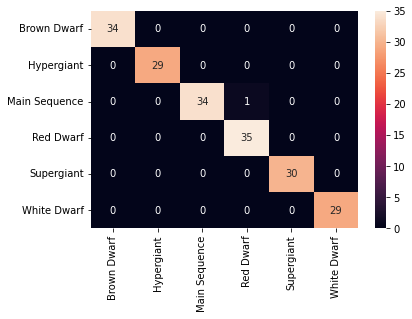

In [20]:
from sklearn.metrics import confusion_matrix

%matplotlib inline

y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

plt.savefig('Matriz de Confusão #02.png', dpi = 400)

Agora podemos ver que as 35 anãs marrons do conjunto de dados de teste foram todas corretamente previstas como anãs marrons. No entanto, 8 estrelas da Sequência Principal foram classificadas como Anãs Vermelhas.

Como dito anteriormente, uma grande vantagem das árvores de decisão é que elas são fáceis de interpretar. Por exemplo, você pode desenhar a árvore de decisão completa para entender os diferentes testes que são feitos antes de tomar a decisão final:

<IPython.core.display.Javascript object>


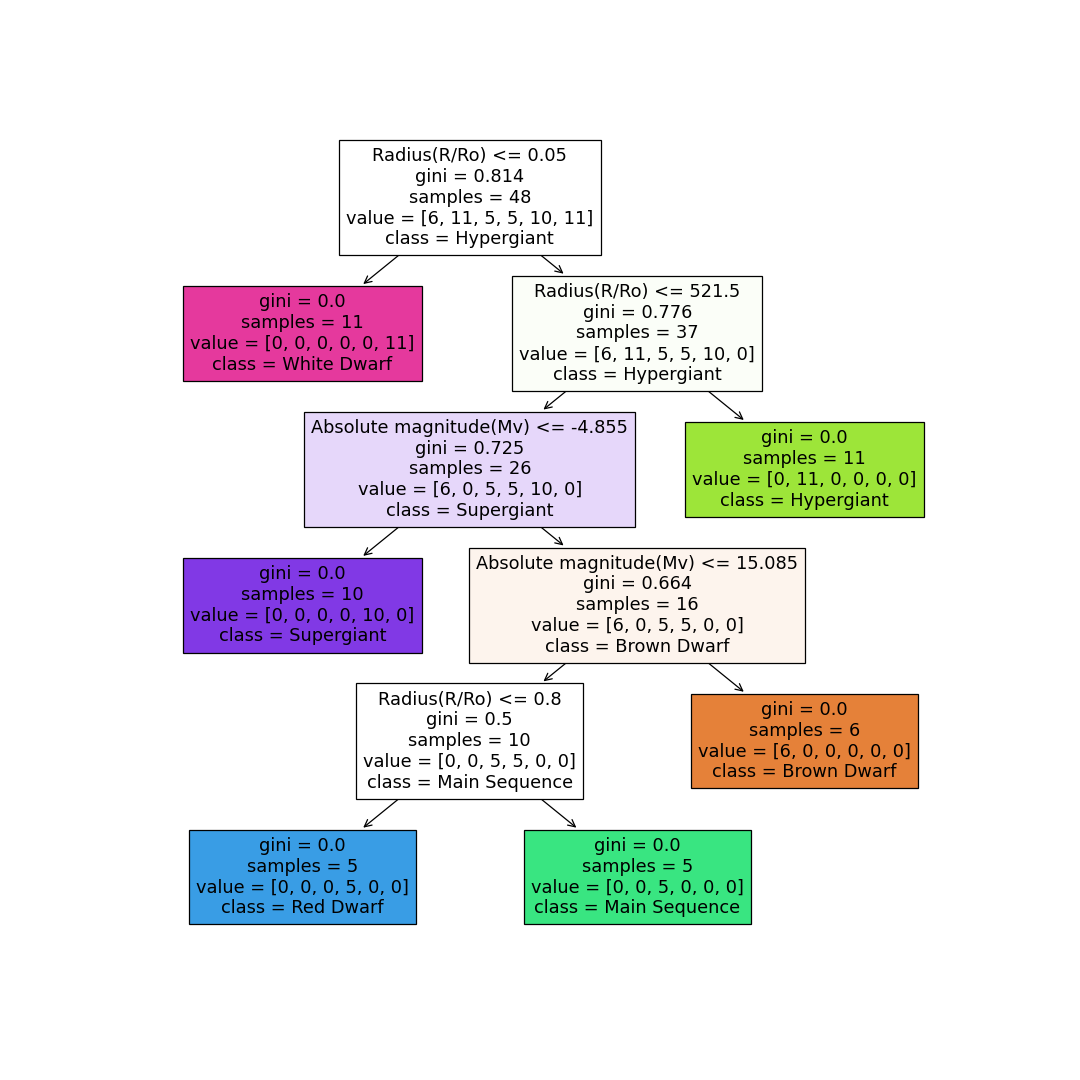

In [21]:
%matplotlib notebook

fig = plt.figure(figsize = (12, 12))
sklearn.tree.plot_tree(tree, filled=True, feature_names=stars_train.drop(columns="Star type").keys(), class_names=class_names)

plt.savefig('Árvore de decisão.png', dpi = 400)

### 2.6 SVM

Agora, as árvores de decisão são boas, mas são modelos bastante simples. No mundo superficial do ML, o *Support Vector Machines* (SVM) está na moda. Mas eu tenho que reescrever todo o meu código para usá-los? Não! Todos os modelos no scikit-learn têm a mesma interface para que você possa trocar seu DecisionTree por um `SVC` (*Support Vector Classifier*).

Veja isso:

In [22]:
from sklearn.svm import SVC

scaler2 = StandardScaler()
X_train_s = scaler2.fit_transform(X_train)
X_test_s = scaler2.transform(X_test)
svm = SVC()
svm.fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.7708333333333334

Excelente. No entanto, há um pequeno problema: o SVM está tendo um desempenho muito ruim na árvore de decisão. Por quê? Deixamos o `sklearn` usar os parâmetros padrão no `SVC()`. Existem vários parâmetros que você pode usar em um SVM. Os dois principais são:

- o kernel (por padrão, o scikit-learn usa um SVM linear, rápido, mas não ótimo. Costumamos usar um kernel RBF, mais lento, mas mais poderoso.)

- o parâmetro de regularização `C` (controla quão "suave" é a borda de decisão).

Então, por exemplo, podemos pedir um SVM com um kernel polinomial de grau 4 e `C = 100` usando:

In [23]:
svm = SVC(C = 100, kernel = 'poly', degree = 4)
svm.fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.9375

Muito melhor. Mas você provavelmente não quer tentar manualmente todos esses valores. Além disso, se você tentar dezenas de combinações e verificar a pontuação todas as vezes no conjunto, estará manualmente superajustando o conjunto de teste. Os hiperparâmetros que você encontrar serão os melhores para seu conjunto de teste, mas muitos não serão os melhores para suas observações futuras.

Portanto, a ideia é explorar automaticamente várias combinações de hiperparâmetros (por exemplo, usando uma pesquisa em grade). Para evitar o overfitting do conjunto de teste, faremos validação cruzada para cada combinação. scikit-learn oferece convenientemente uma ferramenta chamada `GridSearchCV` para este fim e sua interface é a mesma de todos os outros modelos!

In [24]:
from sklearn.model_selection import GridSearchCV

grid = {'C': [1e-2, 0.1, 1.0, 10, 100, 1000, 10000], 'kernel': ['linear', 'rbf'], 'gamma': ['auto', 'scale']}
model = GridSearchCV(SVC(), grid)
model.fit(X_train_s, y_train)
model.score(X_test_s, y_test)

0.9322916666666666

Yay! Encontramos um SVM que executa o mesmo que nossa árvore de decisão. Podemos imprimir seus hiperparâmetros se quisermos reutilizá-los mais tarde.

In [25]:
model.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}

**Dica 2**: seja rigoroso na avaliação do modelo. Use ferramentas `sklearn` integradas para validação cruzada e pesquisa de hiperparâmetros. Não ajuste hiperparâmetros no conjunto de teste!

---

## Referências

- [1] *Star dataset to predict star types (Kaggle)*: https://www.kaggle.com/datasets/deepu1109/star-dataset

- [2] *Construção de um diagrama de Hertzsprung-Russell*: https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Construção%20de%20um%20diagrama%20de%20Hertzsprung-Russell.ipynb

- [3] *Introduction to Machine Learning with Python*, 2016 (Andreas Müller and Sarah Guido)

- [4] *Python Data Science Handbook*, 2016, (Jake VanderPlas)

- [5] *The Elements of Statistical Learning*, 2008 (Hastie, Tibshirani and Friedman)

- [5] *Statistics, Data Mining, and Machine Learning in Astronomy*, 2013 (Ivezic, Conolly and VanderPlas)

---